In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel('/content/global_superstore_2016.xlsx')

In [3]:
df.shape

(51290, 24)

In [6]:
df['Total Cost'] = df['Sales'] - df['Profit']

In [7]:
df['Total Cost'].sum()

np.float64(11175044.6186)

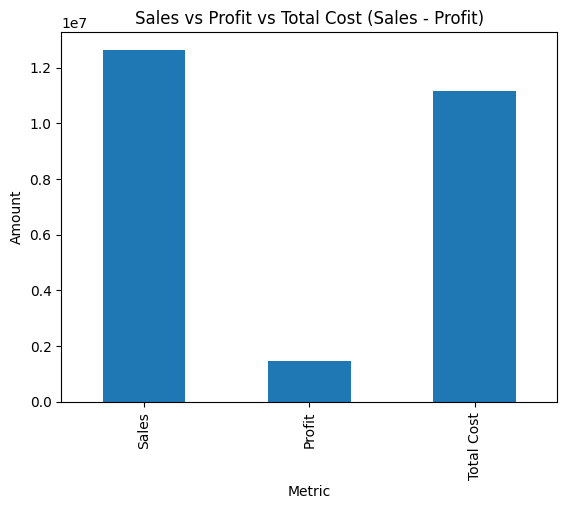

In [9]:
import matplotlib.pyplot as plt
df["Total Cost"] = df["Sales"] - df["Profit"]
totals = df[["Sales", "Profit", "Total Cost"]].sum()
plt.figure()
totals.plot(kind="bar")
plt.title("Sales vs Profit vs Total Cost (Sales - Profit)")
plt.xlabel("Metric")
plt.ylabel("Amount")
plt.show()



In [10]:
india_profit = df[df["Country"] == "India"]["Profit"].sum()
india_profit


np.float64(129050.595)

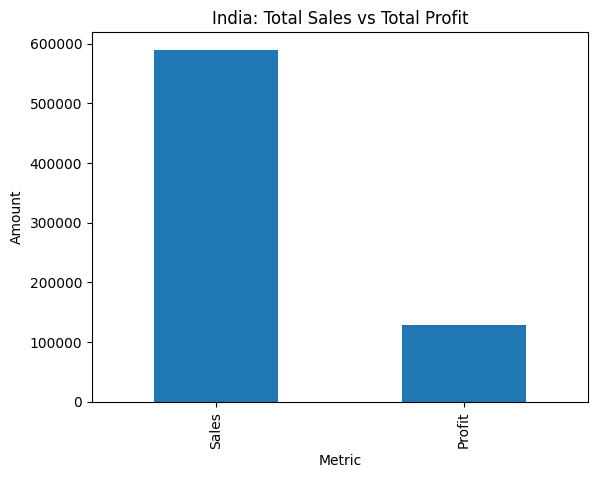

In [11]:
import matplotlib.pyplot as plt
india_df = df[df["Country"] == "India"]
india_totals = india_df[["Sales", "Profit"]].sum()
plt.figure()
india_totals.plot(kind="bar")
plt.title("India: Total Sales vs Total Profit")
plt.xlabel("Metric")
plt.ylabel("Amount")
plt.show()


In [12]:
df["Total Cost"] = df["Sales"] - df["Profit"]
country_cost = df.groupby("Country")["Total Cost"].sum().sort_values()
country_cost.index[4]


'Armenia'

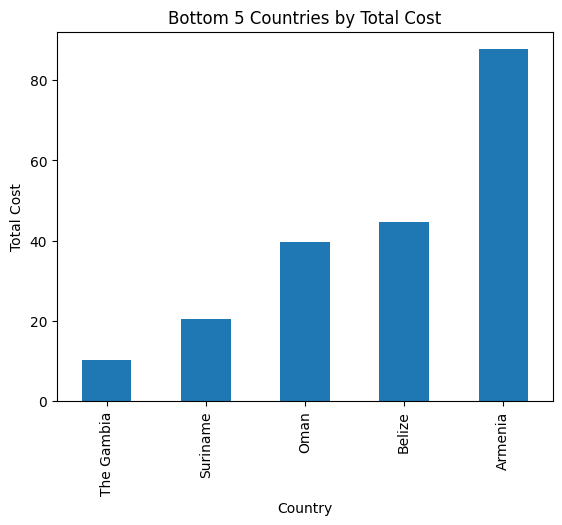

In [13]:
import matplotlib.pyplot as plt
df["Total Cost"] = df["Sales"] - df["Profit"]
lowest_5_countries = (
    df.groupby("Country")["Total Cost"]
    .sum()
    .sort_values()
    .head(5)
)

plt.figure()
lowest_5_countries.plot(kind="bar")
plt.title("Bottom 5 Countries by Total Cost")
plt.xlabel("Country")
plt.ylabel("Total Cost")
plt.show()


In [14]:
# Total Sales in 2015
sales_2015 = df[df["Order Date"].dt.year == 2015]["Sales"].sum()
sales_2015


np.float64(4299865.870560001)

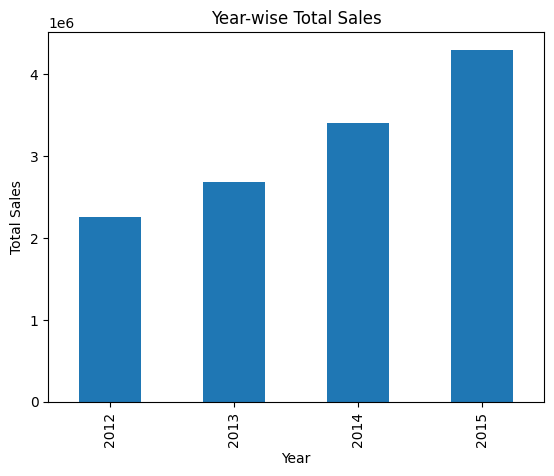

In [15]:
import matplotlib.pyplot as plt
yearly_sales = df.groupby(df["Order Date"].dt.year)["Sales"].sum()
plt.figure()
yearly_sales.plot(kind="bar")
plt.title("Year-wise Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


In [16]:
yearly_sales = df.groupby(df["Order Date"].dt.year)["Sales"].sum()
difference_2015_2014 = yearly_sales.loc[2015] - yearly_sales.loc[2014]
difference_2015_2014


np.float64(894119.4211799996)

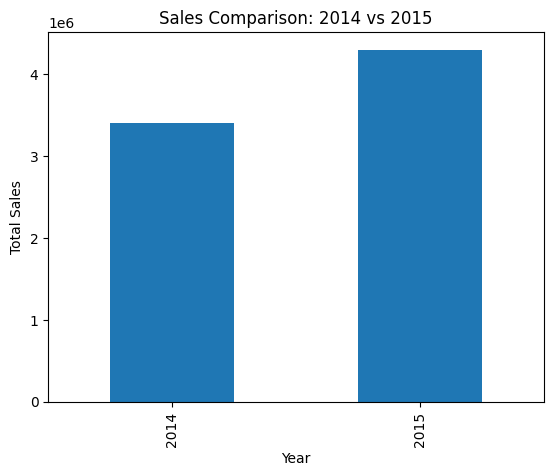

In [18]:
import matplotlib.pyplot as plt
yearly_sales = df.groupby(df["Order Date"].dt.year)["Sales"].sum()
sales_compare = yearly_sales.loc[[2014, 2015]]
plt.figure()
sales_compare.plot(kind="bar")
plt.title("Sales Comparison: 2014 vs 2015")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


In [19]:
china_2015_qty = df[
    (df["Country"] == "China") &
    (df["Order Date"].dt.year == 2015)
]["Quantity"].sum()

china_2015_qty


np.int64(2293)

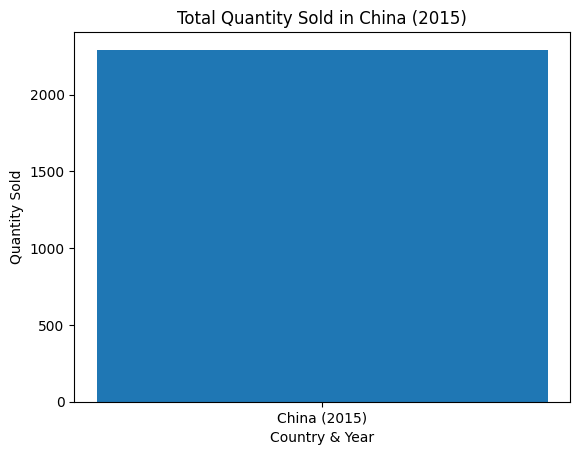

In [20]:
import matplotlib.pyplot as plt
china_2015 = df[
    (df["Country"] == "China") &
    (df["Order Date"].dt.year == 2015)
]
china_2015_qty = china_2015["Quantity"].sum()
plt.figure()
plt.bar(["China (2015)"], [china_2015_qty])
plt.title("Total Quantity Sold in China (2015)")
plt.xlabel("Country & Year")
plt.ylabel("Quantity Sold")
plt.show()


In [22]:
total_discount_amount = (df["Sales"] * df["Discount"]).sum()
total_discount_amount

np.float64(1346352.04021416)

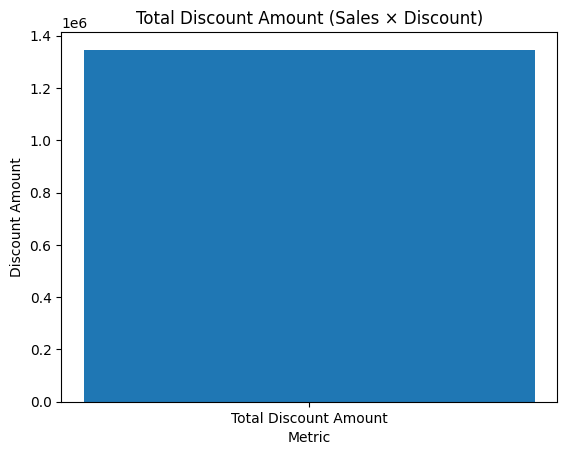

In [24]:
import matplotlib.pyplot as plt
total_discount_amount = (df["Sales"] * df["Discount"]).sum()
plt.figure()
plt.bar(["Total Discount Amount"], [total_discount_amount])
plt.title("Total Discount Amount (Sales × Discount)")
plt.xlabel("Metric")
plt.ylabel("Discount Amount")
plt.show()


In [35]:
july_2015 = df[
    (df["Order Date"].dt.year == 2015) &
    (df["Order Date"].dt.month == 7)
]
profit = july_2015["Profit"].sum()
cost = sales - profit

profit, cost


(np.float64(28035.87258), np.float64(230669.8079))

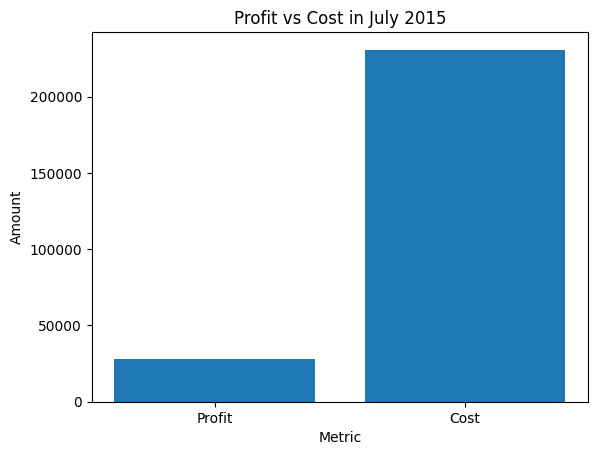

In [36]:
import matplotlib.pyplot as plt
july_2015 = df[
    (df["Order Date"].dt.year == 2015) &
    (df["Order Date"].dt.month == 7)
]
profit = july_2015["Profit"].sum()
sales = july_2015["Sales"].sum()
cost = sales - profit
plt.figure()
plt.bar(["Profit", "Cost"], [profit, cost])
plt.title("Profit vs Cost in July 2015")
plt.xlabel("Metric")
plt.ylabel("Amount")
plt.show()


In [37]:
df[df["Segment"] == "Consumer"].shape[0]

26518

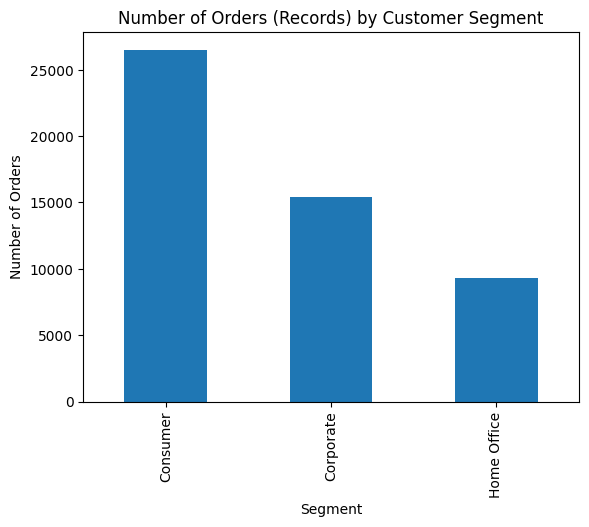

In [38]:
import matplotlib.pyplot as plt
segment_counts = df["Segment"].value_counts()
plt.figure()
segment_counts.plot(kind="bar")
plt.title("Number of Orders (Records) by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Number of Orders")
plt.show()
